# **World Population Analysis**

**1. Data Collection**

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/world_population.csv"  # Adjust if needed
data = pd.read_csv(file_path)

# Display basic information
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

**2. Data Preprocessing**

In [2]:
# Checking for missing values
print(data.isnull().sum())

# Dropping missing values if necessary
data = data.dropna()

# Convert population columns to numeric (if not already)
population_cols = ['2022 Population', '2020 Population', '2015 Population',
                   '2010 Population', '2000 Population', '1990 Population',
                   '1980 Population', '1970 Population']

for col in population_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN after conversion
data = data.dropna()


Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


**3. Exploratory Data Analysis (EDA)**

             Rank  2022 Population  2020 Population  2015 Population  \
count  234.000000     2.340000e+02     2.340000e+02     2.340000e+02   
mean   117.500000     3.407441e+07     3.350107e+07     3.172996e+07   
std     67.694165     1.367664e+08     1.355899e+08     1.304050e+08   
min      1.000000     5.100000e+02     5.200000e+02     5.640000e+02   
25%     59.250000     4.197385e+05     4.152845e+05     4.046760e+05   
50%    117.500000     5.559944e+06     5.493074e+06     5.307400e+06   
75%    175.750000     2.247650e+07     2.144798e+07     1.973085e+07   
max    234.000000     1.425887e+09     1.424930e+09     1.393715e+09   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      2.984524e+07     2.626947e+07     2.271022e+07     1.898462e+07   
std       1.242185e+08     1.116982e+08     9.783217e+07     8.178519e+07   
min       5.960000e+02     6.510000e+02    

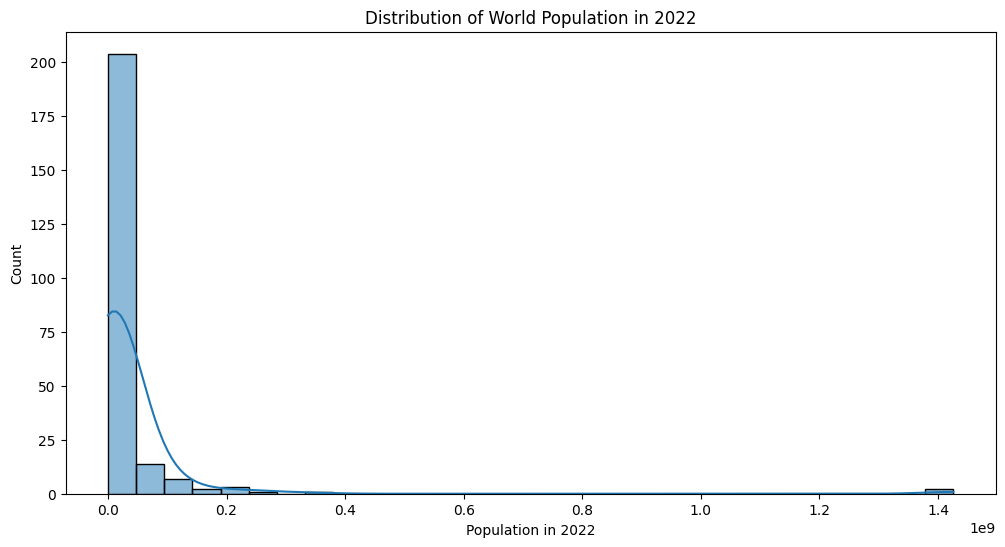

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Distribution of population sizes
plt.figure(figsize=(12,6))
sns.histplot(data['2022 Population'], bins=30, kde=True)
plt.xlabel("Population in 2022")
plt.title("Distribution of World Population in 2022")
plt.show()


**4. Feature Engineering**

In [4]:
# Calculating average population growth rate per decade
data['GrowthRate'] = ((data['2022 Population'] - data['2010 Population']) / data['2010 Population']) * 100


**5. Model Building**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Selecting features and target variable
features = ['Area (km²)', 'Density (per km²)', 'Growth Rate']
X = data[features]
y = data['2022 Population']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

**6. Model Evaluation**

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.1952710722295178e+16
R^2 Score: -2.111331660680886


**7. Visualization**

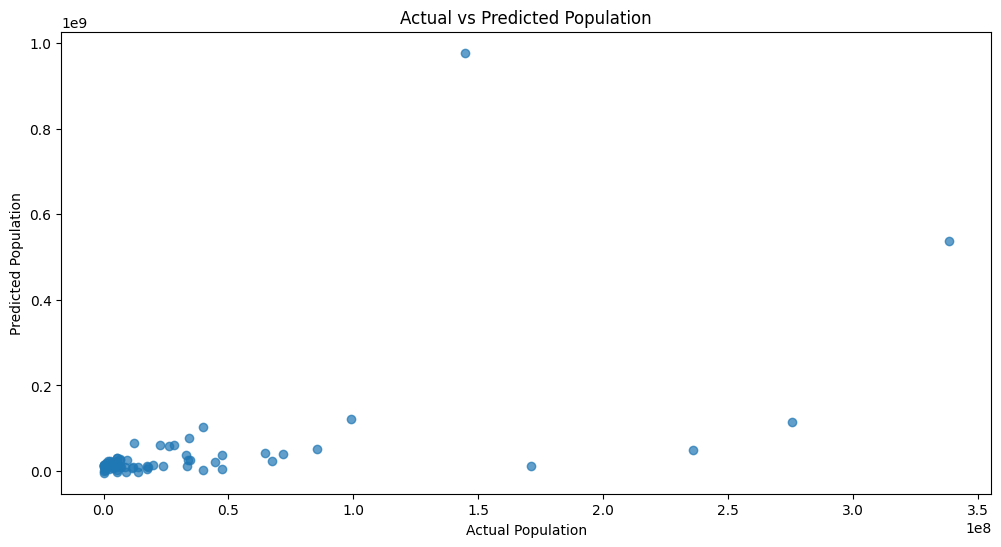

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Actual vs Predicted Population")
plt.show()


**8. Report Generation**

In [8]:
report = pd.DataFrame({"Actual Population": y_test, "Predicted Population": y_pred})
report.to_csv("/content/population_prediction_report.csv", index=False)
print("Report saved successfully!")


Report saved successfully!
